## 平均二乗誤差、決定係数の比較

表を作成して比較

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df = sns.load_dataset('iris')

In [2]:
# x_label を説明変数、y_label を目的変数として線形回帰モデルを作成
# 平均二乗誤差 MSE, 決定係数 R^2 を計算して返す
def regression_erros(df, x_label, y_label):
    X = df[[x_label]]
    Y = df[y_label]
    model = LinearRegression()
    model.fit(X, Y)
    Y_predict = model.predict(X)
    return mean_squared_error(Y, Y_predict), r2_score(Y, Y_predict)

# 確認
regression_erros(df, 'sepal_length', 'sepal_width')

(0.1861043758938136, 0.013822654141080637)

In [3]:
labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 行と列のラベルを付けて DataFrame を作成
result_df = pd.DataFrame(columns=labels, index=labels)

# 行から列を予測した時の 平均二乗誤差 MSE, 決定係数 R^2 の表を作成
for x_label in labels:
    for y_label in labels:
        if x_label is y_label:
            continue
        mse, r2 = regression_erros(df, x_label, y_label)
        result_df.at[y_label, x_label] = [mse, r2]

result_df

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,NaN,"[0.6717073053166401, 0.013822654141080859]","[0.16350022510554504, 0.759954645772515]","[0.22543259797409776, 0.6690276860464137]"
sepal_width,"[0.1861043758938136, 0.013822654141080637]",NaN,"[0.1540725768226813, 0.1835609229987637]","[0.1634162661041927, 0.13404819847567728]"
petal_length,"[0.7430610341321241, 0.759954645772515]","[2.5272893400281986, 0.1835609229987637]",NaN,"[0.22563168777869236, 0.9271098389904927]"
petal_width,"[0.19101500769427363, 0.6690276860464135]","[0.49976926485227013, 0.13404819847567717]","[0.04206730919499318, 0.9271098389904927]",NaN


X（横）からY（縦）を予測

sepal_width を説明変数にした場合も、目的変数とした場合も、決定係数が低くなり、うまく説明できない

回帰直線を追加した散布図マトリックスと比較してみる

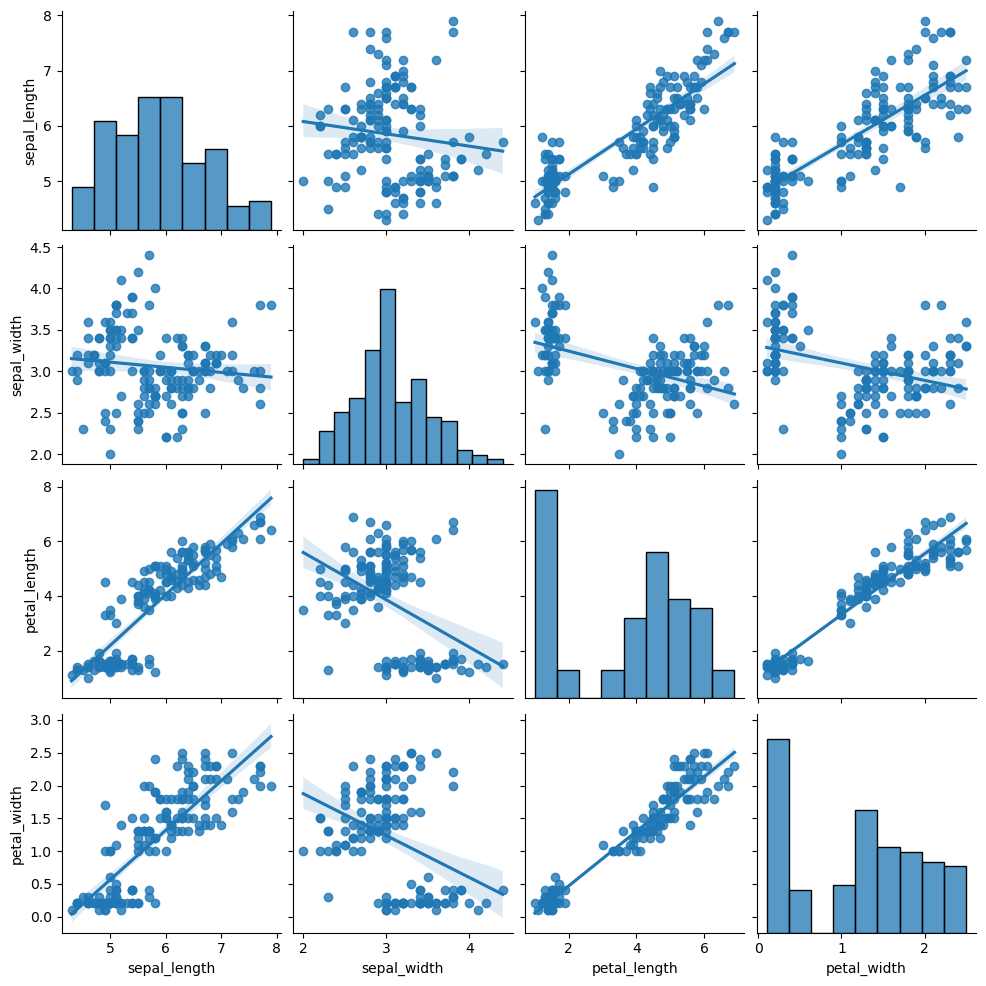

In [4]:
# 回帰直線を追加した散布図マトリックス
sns.pairplot(df, kind='reg')